# Downloads dos dados

In [136]:
!pip install kaggle -q

In [137]:
!kaggle datasets download -d rabieelkharoua/alzheimers-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
alzheimers-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [138]:
!unzip /content/alzheimers-disease-dataset.zip -d mind_institute

Archive:  /content/alzheimers-disease-dataset.zip
replace mind_institute/alzheimers_disease_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Bibliotecas

In [139]:
# Biblioteca de tratamento de dados
import pandas as pd
import numpy as np

# Biblioteca de Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca para separ em treino e teste
from sklearn.model_selection import train_test_split

# Salvando modelos,preprocessos e datasets
import pickle

# Pipeline e Columns Transform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

# Rebalanceamento dos dados
from imblearn.over_sampling import ADASYN,SMOTE

# Normalização dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
# Modelos ussados
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#Validação do modelo
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Busca de Hiper Parametros com RandosearhCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint



Para retirar os waning foi utilizado o seguinte código

In [140]:
import warnings
warnings.filterwarnings('ignore')

# Crisp-DM


Para melhor desenvolvimento e evitar possíveis problemas, o projeto será desenvolvido com a metodologia Crisp-DM, essa metodologia consite em 6 principais etapas que faz com que o desenvolvimento ocorra desde do conhecimneto e a problematização do projeto até a implementação no processo. dentre elas as etapas são:
* Entendimento do negócio
* Entendimento dos dados
* Preparação dos dados
* Modelagem
* Avaliação
* Implementação

Com base na metodologia Crisp-DM, a estruturação do projeto será feita da seguinte maneira:

* Business Understanding
* Data Understanding
  * Separção de dataset treino e teste
  * Exploração de dados
  * Observando as distribuição das fetures
  * Outliers
  * Matriz de Correlação

* Data Preparation

* Modeling
  * Preprocessamento dos dados
  * Pipeline
  * Tuning
  * Pipeline + Tuning

* Evaluation
  * Cross Validation
  * Matriz de Confusão
  * Curva-Roc

* Deploy


----------



# Business Understanding

* Contexto

  Nas idades mais avançadas é comun as pessoas sofrerem perda de memória, porém junto a esse avanço vem a probabilidade do desenvolvimento da doença de Alzheimer, doença essa que as etapas iniciais também está relacionada com perda de memórias mais outros tipos de deterioração como reflexo, falas e comportamentos,assim é comun a procura de um médico especializado para identificar se a perda de memória é um fator normal ou se é um estágio inicial do Alzheimer. Dessa forma, o intuito desse projeto é criar um modelo **supervisionado** de Machine Learning com a variável dependente sendo o **'Diagnóstico'** onde 0 significa não possui e 1 significa possui, esse modelo tem como objetivo ser **mais um filtro** para a determinação se o paciente possui ou não a doença antes da confimação do especialista.

*  Objetivo

 * Criar um modelo capaz de prever a presença da doença de Alzheimer no paciente
 * Ser capaz de observar quais são as principais variáveis relacionado com a target

* Beneficios
  
  * O modelo será utilizado como filtro extra para auxiliar o especialista na toma de decisão

* Conhecendo as Features e o Target

ID do Paciente

    PatientID: Um identificador exclusivo atribuído a cada paciente (de 4751 a 6900).

Detalhes Demográficos

    Idade: A idade dos pacientes varia de 60 a 90 anos.
    Sexo: Sexo dos pacientes, onde 0 representa Masculino e 1 representa Feminino.
    Etnia: A etnia dos pacientes, codificada da seguinte forma:
        0: Caucasiano
        1: Afro-americano
        2: Asiático
        3: Outro
    Nível de Educação: O nível de educação dos pacientes, codificado da seguinte forma:
        0: Nenhum
        1: Ensino Médio
        2: Bacharelado
        3: Superior

Fatores de Estilo de Vida

    IMC: Índice de Massa Corporal dos pacientes, variando de 15 a 40.
    Tabagismo: Status de tabagismo, onde 0 indica Não e 1 indica Sim.
    Consumo de Álcool: Consumo semanal de álcool em unidades, variando de 0 a 20.
    Atividade Física: Atividade física semanal em horas, variando de 0 a 10.
    Qualidade da Dieta: Pontuação da qualidade da dieta, variando de 0 a 10.
    Qualidade do Sono: Pontuação da qualidade do sono, variando de 4 a 10.

Histórico Médico

    Histórico Familiar de Alzheimer: Histórico familiar de Doença de Alzheimer, onde 0 indica Não e 1 indica Sim.
    Doença Cardiovascular: Presença de doença cardiovascular, onde 0 indica Não e 1 indica Sim.
    Diabetes: Presença de diabetes, onde 0 indica Não e 1 indica Sim.
    Depressão: Presença de depressão, onde 0 indica Não e 1 indica Sim.
    Lesão na Cabeça: Histórico de lesão na cabeça, onde 0 indica Não e 1 indica Sim.
    Hipertensão: Presença de hipertensão, onde 0 indica Não e 1 indica Sim.

Medições Clínicas

    Pressão Arterial Sistólica: Pressão arterial sistólica, variando de 90 a 180 mmHg.
    Pressão Arterial Diastólica: Pressão arterial diastólica, variando de 60 a 120 mmHg.
    Colesterol Total: Níveis de colesterol total, variando de 150 a 300 mg/dL.
    Colesterol LDL: Níveis de colesterol de lipoproteína de baixa densidade, variando de 50 a 200 mg/dL.
    Colesterol HDL: Níveis de colesterol de lipoproteína de alta densidade, variando de 20 a 100 mg/dL.
    Triglicerídeos: Níveis de triglicerídeos, variando de 50 a 400 mg/dL.

Avaliações Cognitivas e Funcionais

    MMSE: Pontuação do Mini Exame do Estado Mental, variando de 0 a 30. Pontuações mais baixas indicam comprometimento cognitivo (qualquer pontuação de 24 ou mais indica cognição normal. Abaixo disso, as pontuações podem indicar comprometimento cognitivo grave (≤9 pontos), moderado (10–18 pontos) ou leve (19–23 pontos)).
    Avaliação Funcional: Pontuação de avaliação funcional, variando de 0 a 10. Pontuações mais baixas indicam maior comprometimento.
    Queixas de Memória: Presença de queixas de memória, onde 0 indica Não e 1 indica Sim.
    Problemas Comportamentais: Presença de problemas comportamentais, onde 0 indica Não e 1 indica Sim.
    Atividades da Vida Diária (ADL): Pontuação das Atividades da Vida Diária, variando de 0 a 10. Pontuações mais baixas indicam maior comprometimento.

Sintomas

    Confusão: Presença de confusão, onde 0 indica Não e 1 indica Sim.
    Desorientação: Presença de desorientação, onde 0 indica Não e 1 indica Sim.
    Mudanças de Personalidade: Presença de mudanças de personalidade, onde 0 indica Não e 1 indica Sim.
    Dificuldade em Completar Tarefas: Presença de dificuldade em completar tarefas, onde 0 indica Não e 1 indica Sim.
    Esquecimento: Presença de esquecimento, onde 0 indica Não e 1 indica Sim.

Informações de Diagnóstico

    Diagnóstico: Status de diagnóstico para a Doença de Alzheimer, onde 0 indica Não e 1 indica Sim.

Informações Confidenciais

    Médico Responsável: Esta coluna contém informações confidenciais sobre o médico responsável, com "XXXConfid" como valor para todos os pacientes.

# Data Understanding

##  Separação de dataset treino e teste

* A separação do dataset antes de qualquer análise evita o data leakage, oque seria a contaminação dos dados de treino com os dados de teste e vice versa.

In [142]:
dados = pd.read_csv('/content/mind_institute/alzheimers_disease_data.csv')

In [143]:
X = dados.drop(columns = ['Diagnosis','PatientID','DoctorInCharge'], axis = 1)
y = dados.Diagnosis

seed = 1337

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = seed,test_size = 0.2,stratify = y)


dataset_treino = pd.concat([X_train, y_train], axis = 1)
dataset_teste = pd.concat([X_test, y_test], axis = 1)

# salvando os datasets
with open('dataset_treino','wb') as dataset:
  pickle.dump(dataset_treino,dataset)

with open('dataset_teste','wb') as dataset:
  pickle.dump(dataset_teste,dataset)

In [185]:
dataset_treino.to_csv('alzheimer_treino.csv',index = False)
dataset_teste.to_csv('alzheimer_teste.csv',index = False)

In [144]:
print(dataset_treino.shape)
print(dataset_teste.shape)

(1719, 33)
(430, 33)


## Exploração de dados

Antes de fazer a primeira análise, é possível observar que algumas colunas não trazem nenhum tipo de informação, assim as colunas que serão retirados serão: PatientID, DoctorInCharge

In [145]:
#dataset_treino.drop(columns = ['PatientID','DoctorInCharge'],inplace = True)

In [146]:
dataset_treino.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [147]:
for col in dataset_treino.columns:
  print(col)
  print(dataset_treino[col].unique())
  print('--'*30)

Age
[67 62 76 80 71 82 83 77 73 65 64 84 86 60 70 90 75 79 69 78 72 87 61 85
 81 68 74 66 63 88 89]
------------------------------------------------------------
Gender
[1 0]
------------------------------------------------------------
Ethnicity
[0 1 3 2]
------------------------------------------------------------
EducationLevel
[0 1 2 3]
------------------------------------------------------------
BMI
[37.44668766 24.60781009 24.56985169 ... 31.03738883 25.64236892
 37.19396845]
------------------------------------------------------------
Smoking
[1 0]
------------------------------------------------------------
AlcoholConsumption
[14.86461781  9.61648684 15.08368185 ...  2.67225933  3.32926838
 10.17986044]
------------------------------------------------------------
PhysicalActivity
[4.04603115 9.36549183 2.40862772 ... 2.57686192 7.24933357 2.8927793 ]
------------------------------------------------------------
DietQuality
[9.43514688 1.18624088 4.03809845 ... 8.08518932 2.2800236

In [148]:
dataset_treino.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1641,67,1,0,0,37.446688,1,14.864618,4.046031,9.435147,6.698426,...,1.717378,0,0,1.193409,0,0,1,1,0,1
572,62,0,0,1,24.607810,0,9.616487,9.365492,1.186241,4.980156,...,2.808937,1,0,5.480381,0,0,0,0,1,0
1463,76,1,0,0,24.569852,1,15.083682,2.408628,4.038098,6.247533,...,0.952095,0,0,9.714905,0,1,1,0,0,0
792,62,1,0,1,39.653212,0,12.342195,2.393694,4.338271,6.557983,...,4.792863,1,0,9.432533,1,0,0,0,0,1
967,80,0,0,1,22.031611,0,19.556823,6.963131,9.465377,5.595908,...,2.003967,0,0,9.455613,0,0,0,1,0,0


In [149]:
dataset_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 1641 to 1519
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1719 non-null   int64  
 1   Gender                     1719 non-null   int64  
 2   Ethnicity                  1719 non-null   int64  
 3   EducationLevel             1719 non-null   int64  
 4   BMI                        1719 non-null   float64
 5   Smoking                    1719 non-null   int64  
 6   AlcoholConsumption         1719 non-null   float64
 7   PhysicalActivity           1719 non-null   float64
 8   DietQuality                1719 non-null   float64
 9   SleepQuality               1719 non-null   float64
 10  FamilyHistoryAlzheimers    1719 non-null   int64  
 11  CardiovascularDisease      1719 non-null   int64  
 12  Diabetes                   1719 non-null   int64  
 13  Depression                 1719 non-null   int64  

In [150]:
dataset_treino.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,74.945899,0.506690,0.702152,1.303665,27.787146,0.289703,9.930975,4.930484,4.995930,7.043772,...,5.054040,0.210006,0.154159,4.984531,0.203607,0.163467,0.151251,0.153578,0.302501,0.353694
std,8.963059,0.500101,0.996940,0.913451,7.258103,0.453757,5.755495,2.862520,2.910288,1.764006,...,2.899199,0.407431,0.361207,2.916113,0.402797,0.369899,0.358397,0.360648,0.459475,0.478255
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.699874,0.000000,4.949771,2.571963,2.436207,5.472780,...,2.555283,0.000000,0.000000,2.394896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.941580,0.000000,9.786784,4.733116,5.079624,7.080829,...,5.098709,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,34.008852,1.000000,15.080567,7.453158,7.561277,8.557871,...,7.538183,0.000000,0.000000,7.542889,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.988291,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insights

*   Pela info, temos que o dataset não possui nenhum nenhum dados faltantes ou vazios;
*   É possível observar que o dataset é fundamentado em pessoas na terceira idade, já que a doença mostra-se mais presente durante nessa faixa etária;
*   Um ponto interessante a observar é a média dos valores de BMI de 27.65, esse valor mostra que no geral os pacientes estudados possuem pesos acima da média mas não estão no nível de obesidade. Além disso obsevando a presença percentual vemos que somente um pouco mais de 25% dos pacientes estudados possui um BMI saudável(18.9 a 24.9) enquanto o restante estão acima do peso ou obesidade severa;

*  Apesar de não conhecermos qual unidade utilizada, temos que a quantidade de álcool consumido pelos pacientes em média são de 10.00unidades, o que, ao observar que 25% dessa população bebe 5.75, vemos que a média de consumo álcoolico é bem elevada.



## Observando as distribuição das features

Como o nosso dataset possui dados categoricos e numérico, é necessário a separação dos dados para observar a distribuição

In [151]:
feat_numerico = dataset_treino[['Age','BMI','AlcoholConsumption','PhysicalActivity',
                         'DietQuality','SleepQuality','CholesterolTotal',
                         'CholesterolLDL','CholesterolTriglycerides','MMSE',
                         'FunctionalAssessment','ADL','CholesterolHDL','DiastolicBP','SystolicBP']]

feat_col = ['Age','BMI','AlcoholConsumption','PhysicalActivity',
                         'DietQuality','SleepQuality','CholesterolTotal',
                         'CholesterolLDL','CholesterolTriglycerides','MMSE',
                         'FunctionalAssessment','ADL','CholesterolHDL','DiastolicBP','SystolicBP']

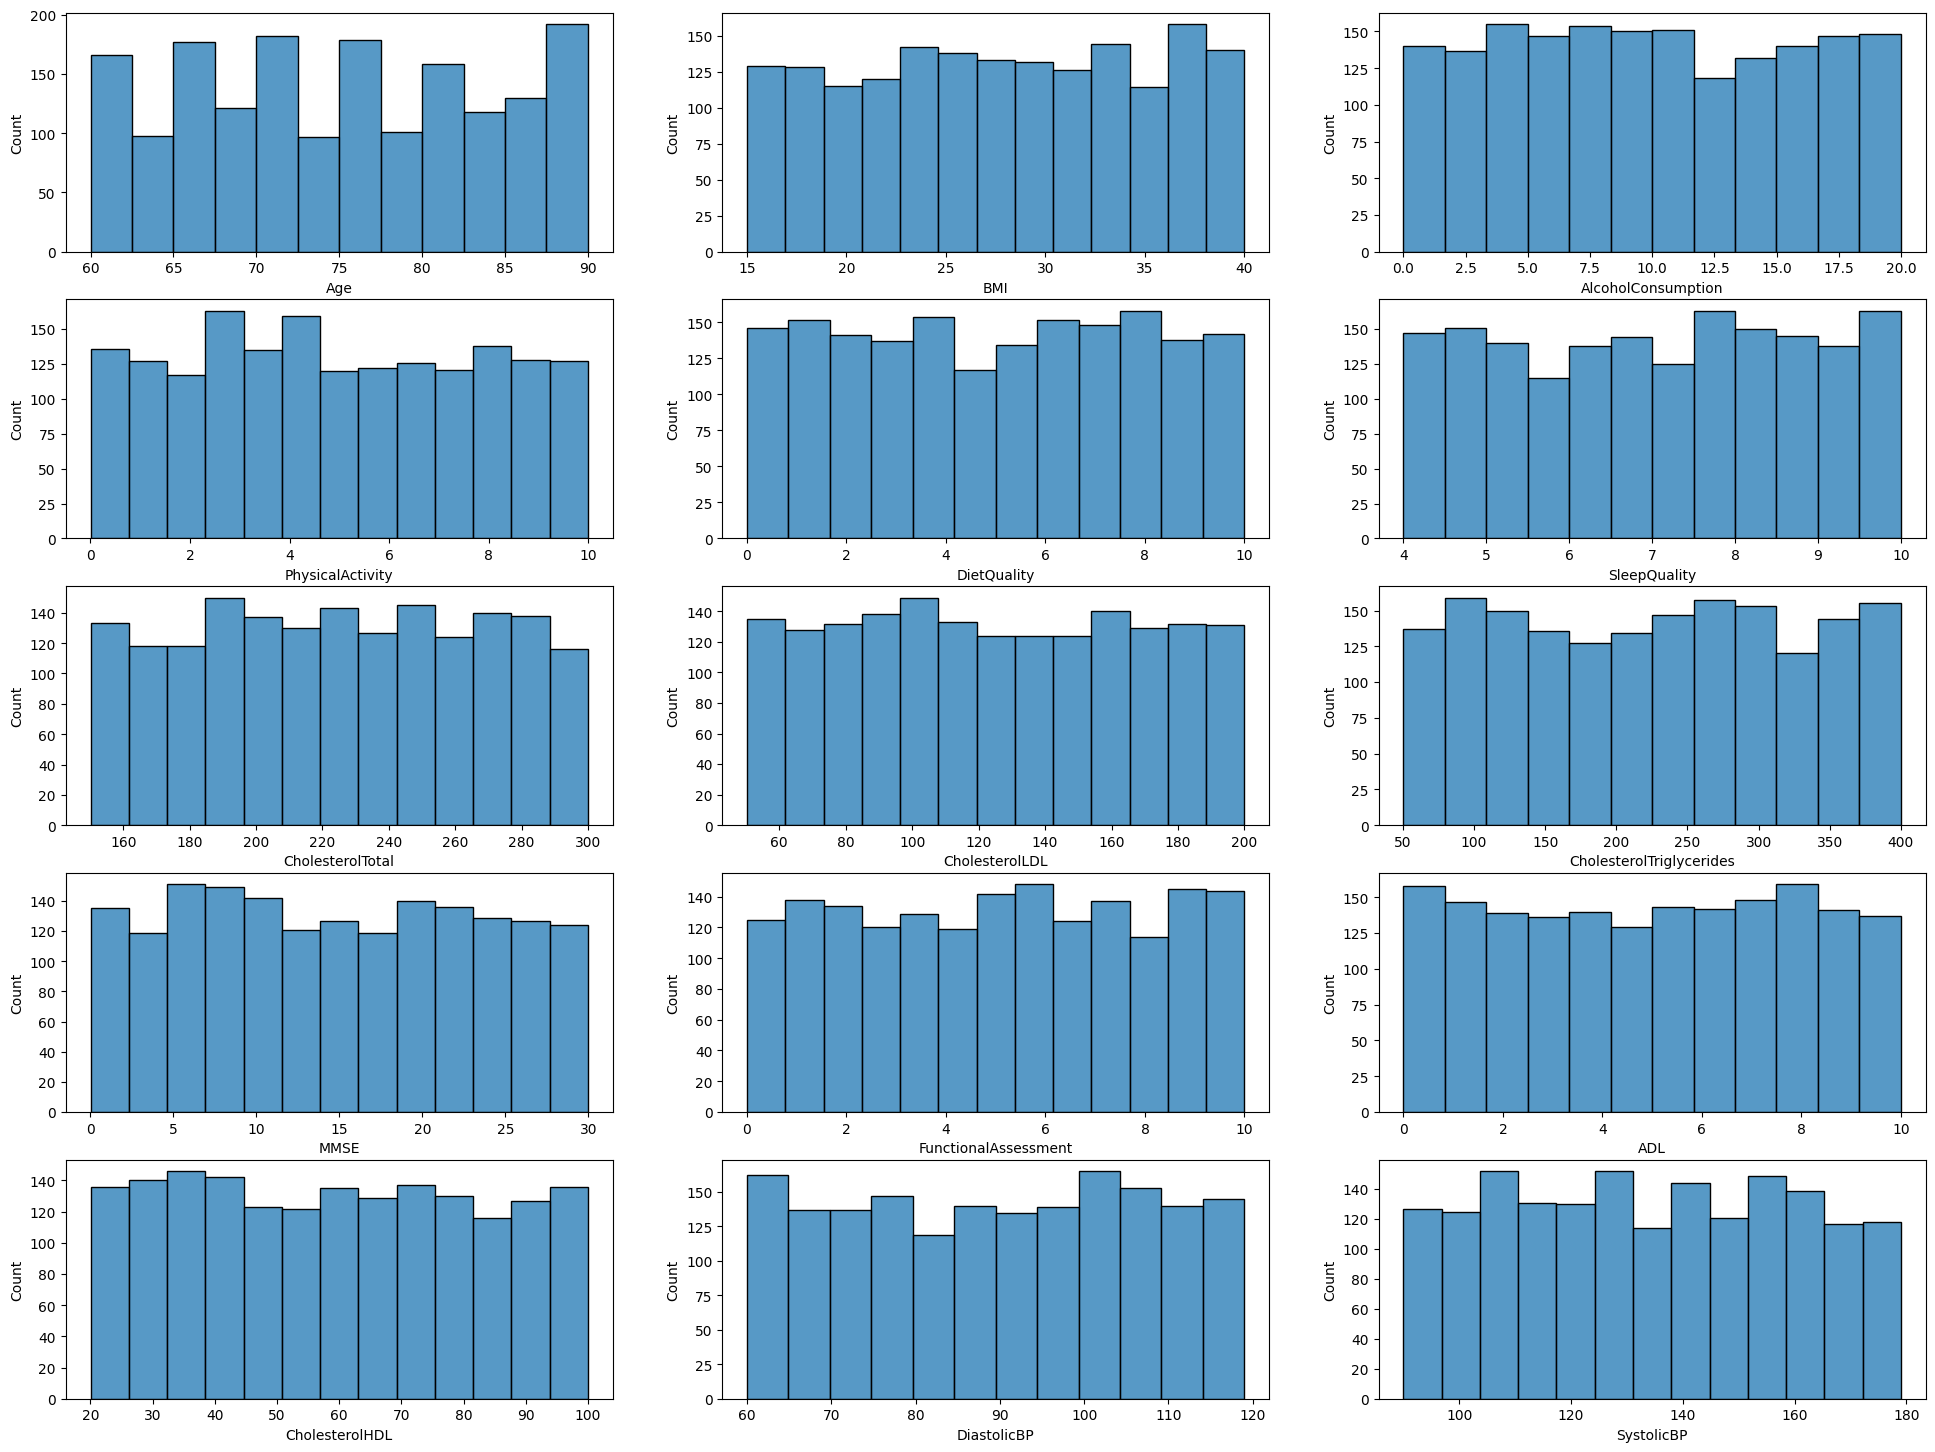

In [152]:
fig, axs = plt.subplots(5,3,figsize = (24,18))

col_num = 0
linha = 5
coluna = 3

for i in range(linha):
  for j in range(coluna):
    sns.histplot(data = dataset_treino, x = feat_numerico.columns[col_num], ax = axs[i,j])
    col_num +=1


In [153]:
feat_cat = dataset_treino.drop(columns = ['Age','BMI','AlcoholConsumption','PhysicalActivity',
                         'DietQuality','SleepQuality','CholesterolTotal',
                         'CholesterolLDL','CholesterolTriglycerides','MMSE',
                         'FunctionalAssessment','ADL','CholesterolHDL','DiastolicBP','SystolicBP'], axis = 1)

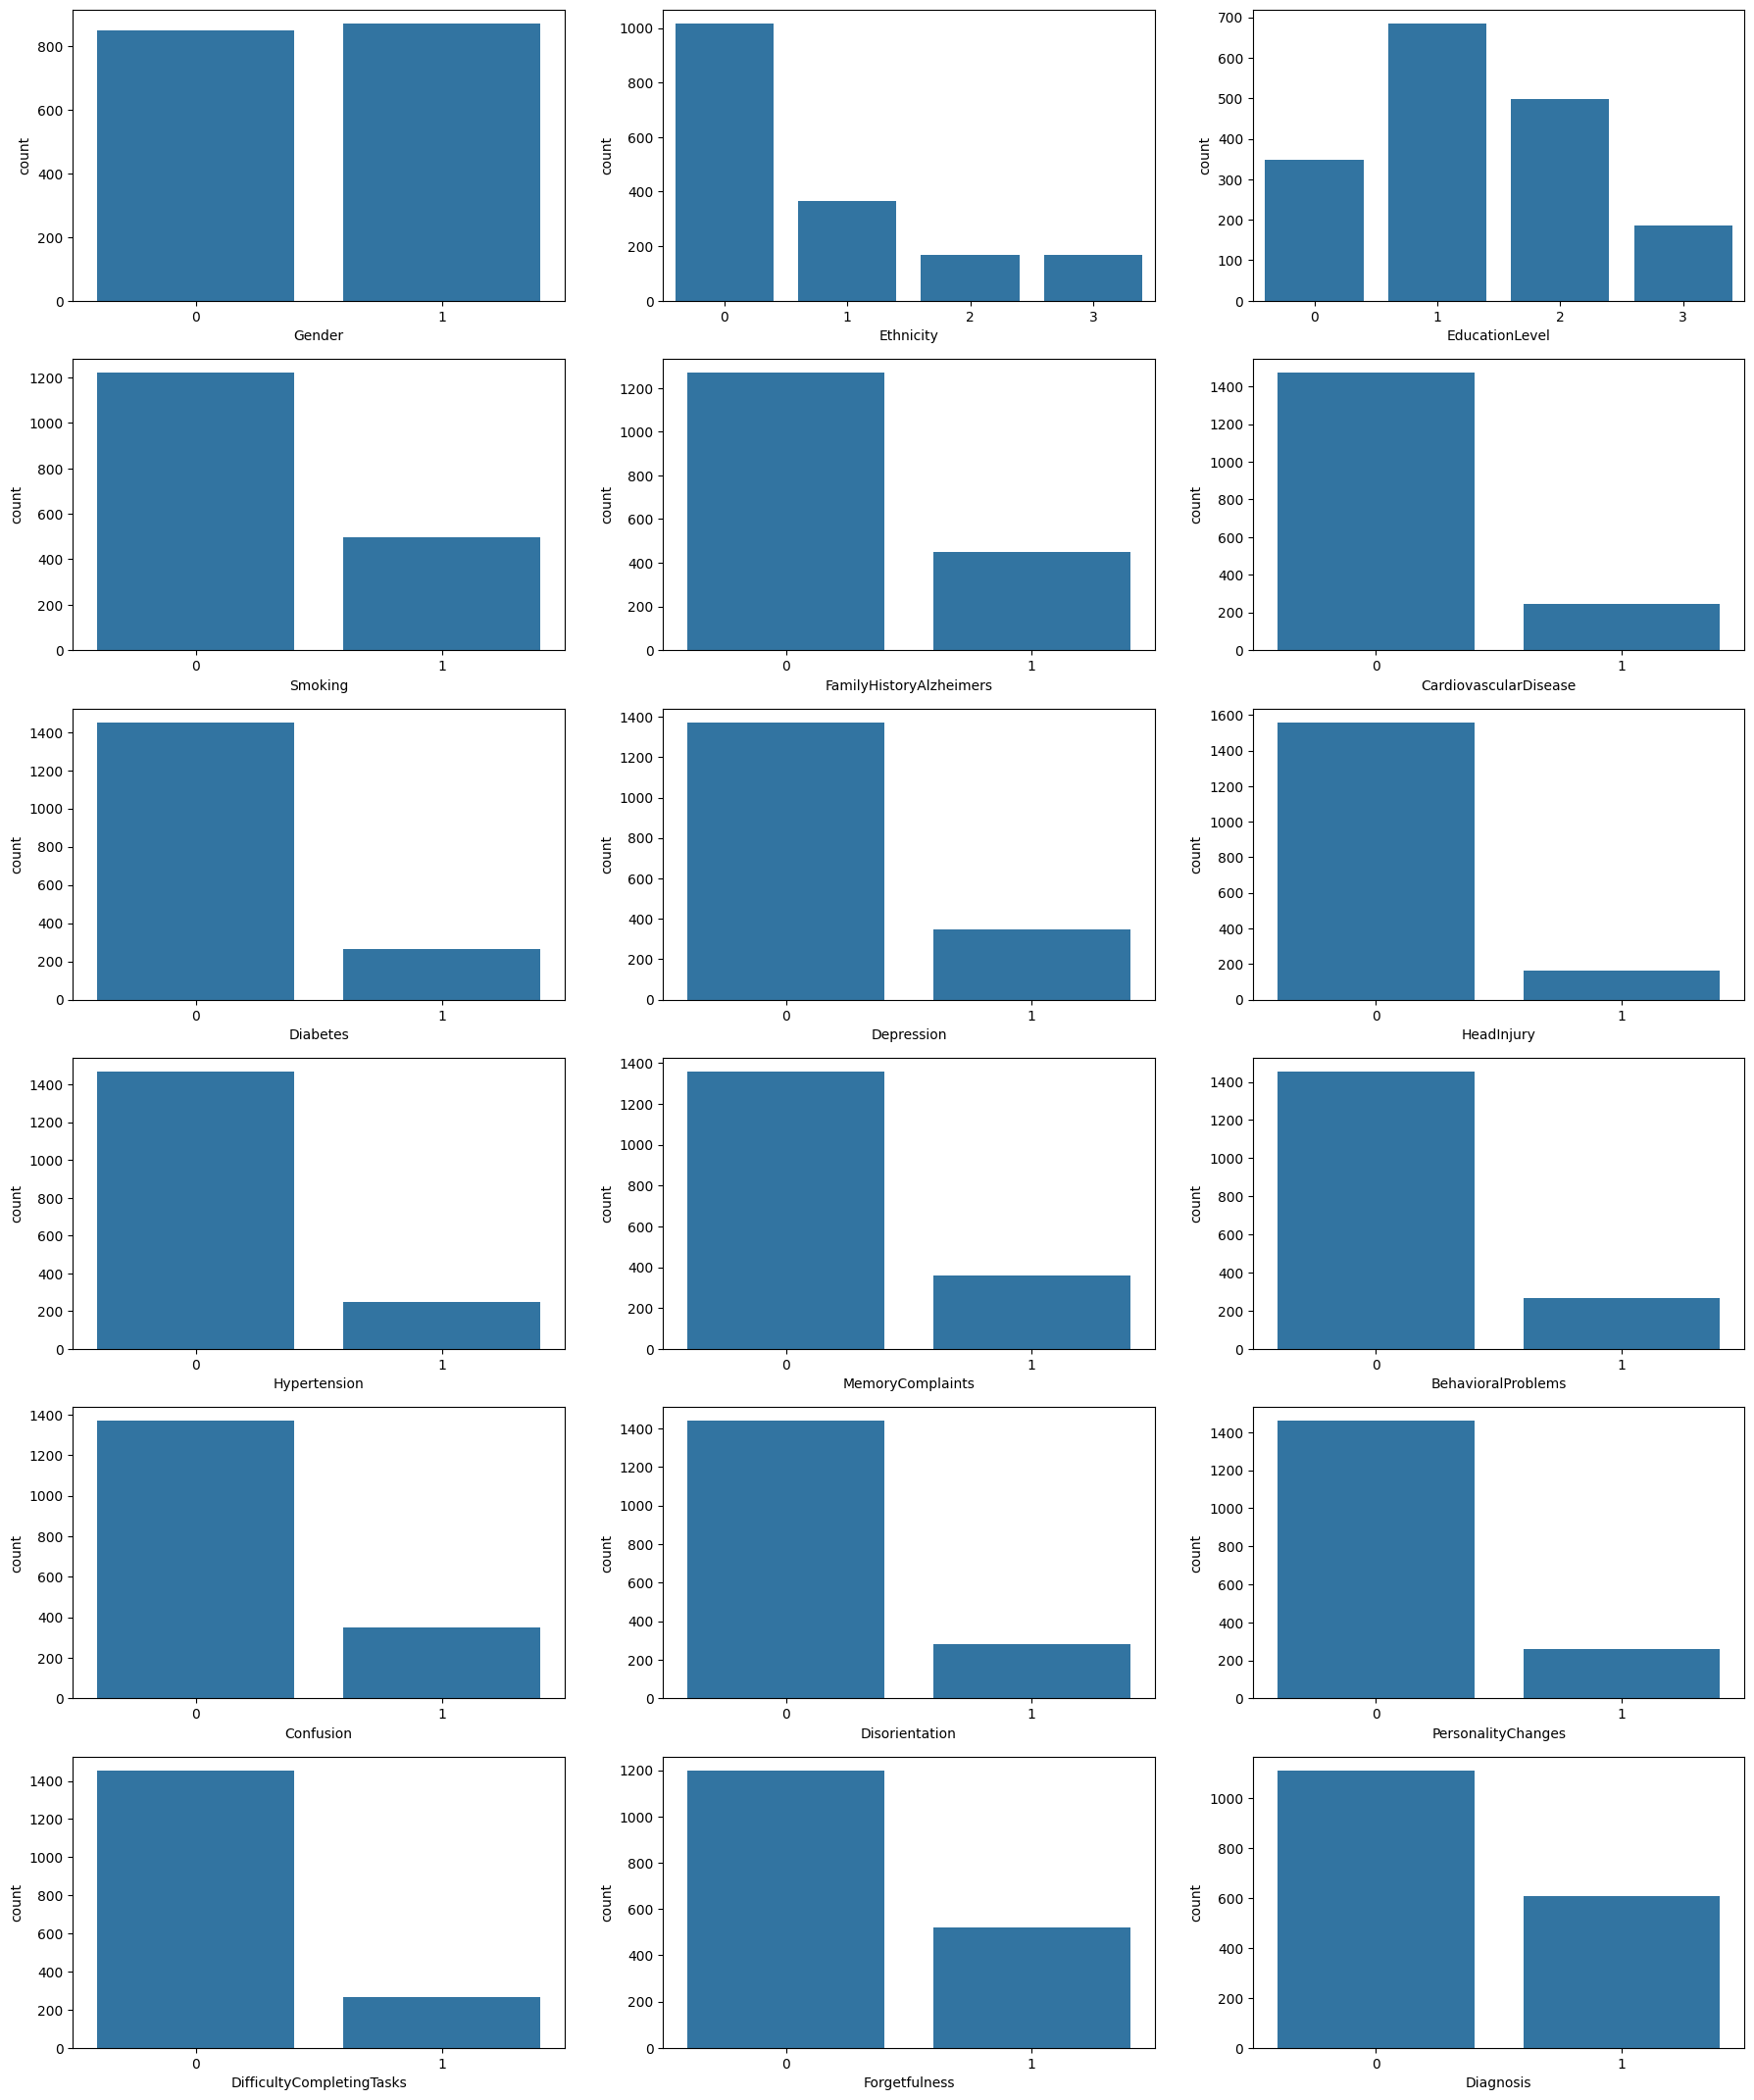

In [154]:
fig, axs = plt.subplots(6,3,figsize = (22,27))

col_num = 0
linha = 6
coluna = 3

for i in range(linha):
  for j in range(coluna):
    sns.countplot(data = dataset_treino, x = feat_cat.columns[col_num], ax = axs[i,j])
    col_num +=1

<Axes: xlabel='Diagnosis', ylabel='count'>

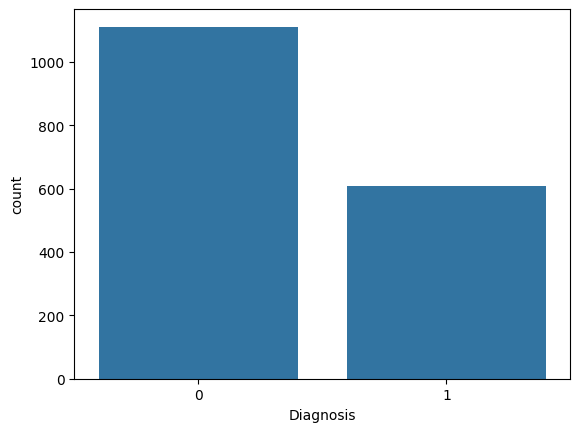

In [155]:
sns.countplot(data = dataset_treino, x = 'Diagnosis')

Insights



*   O Gráfico de histograma para as features numéricas mostra que a distribuição não segue uma normalidade, assim futuramente no preprocessamento será feito com o StandardScaler;
*  O Gráfico countplot da variável target mostra o desbalanceamento dos dados, nesse caso nós iremos utilizar o ADASYN para trazer nivelamento do resultado;

## Outliers

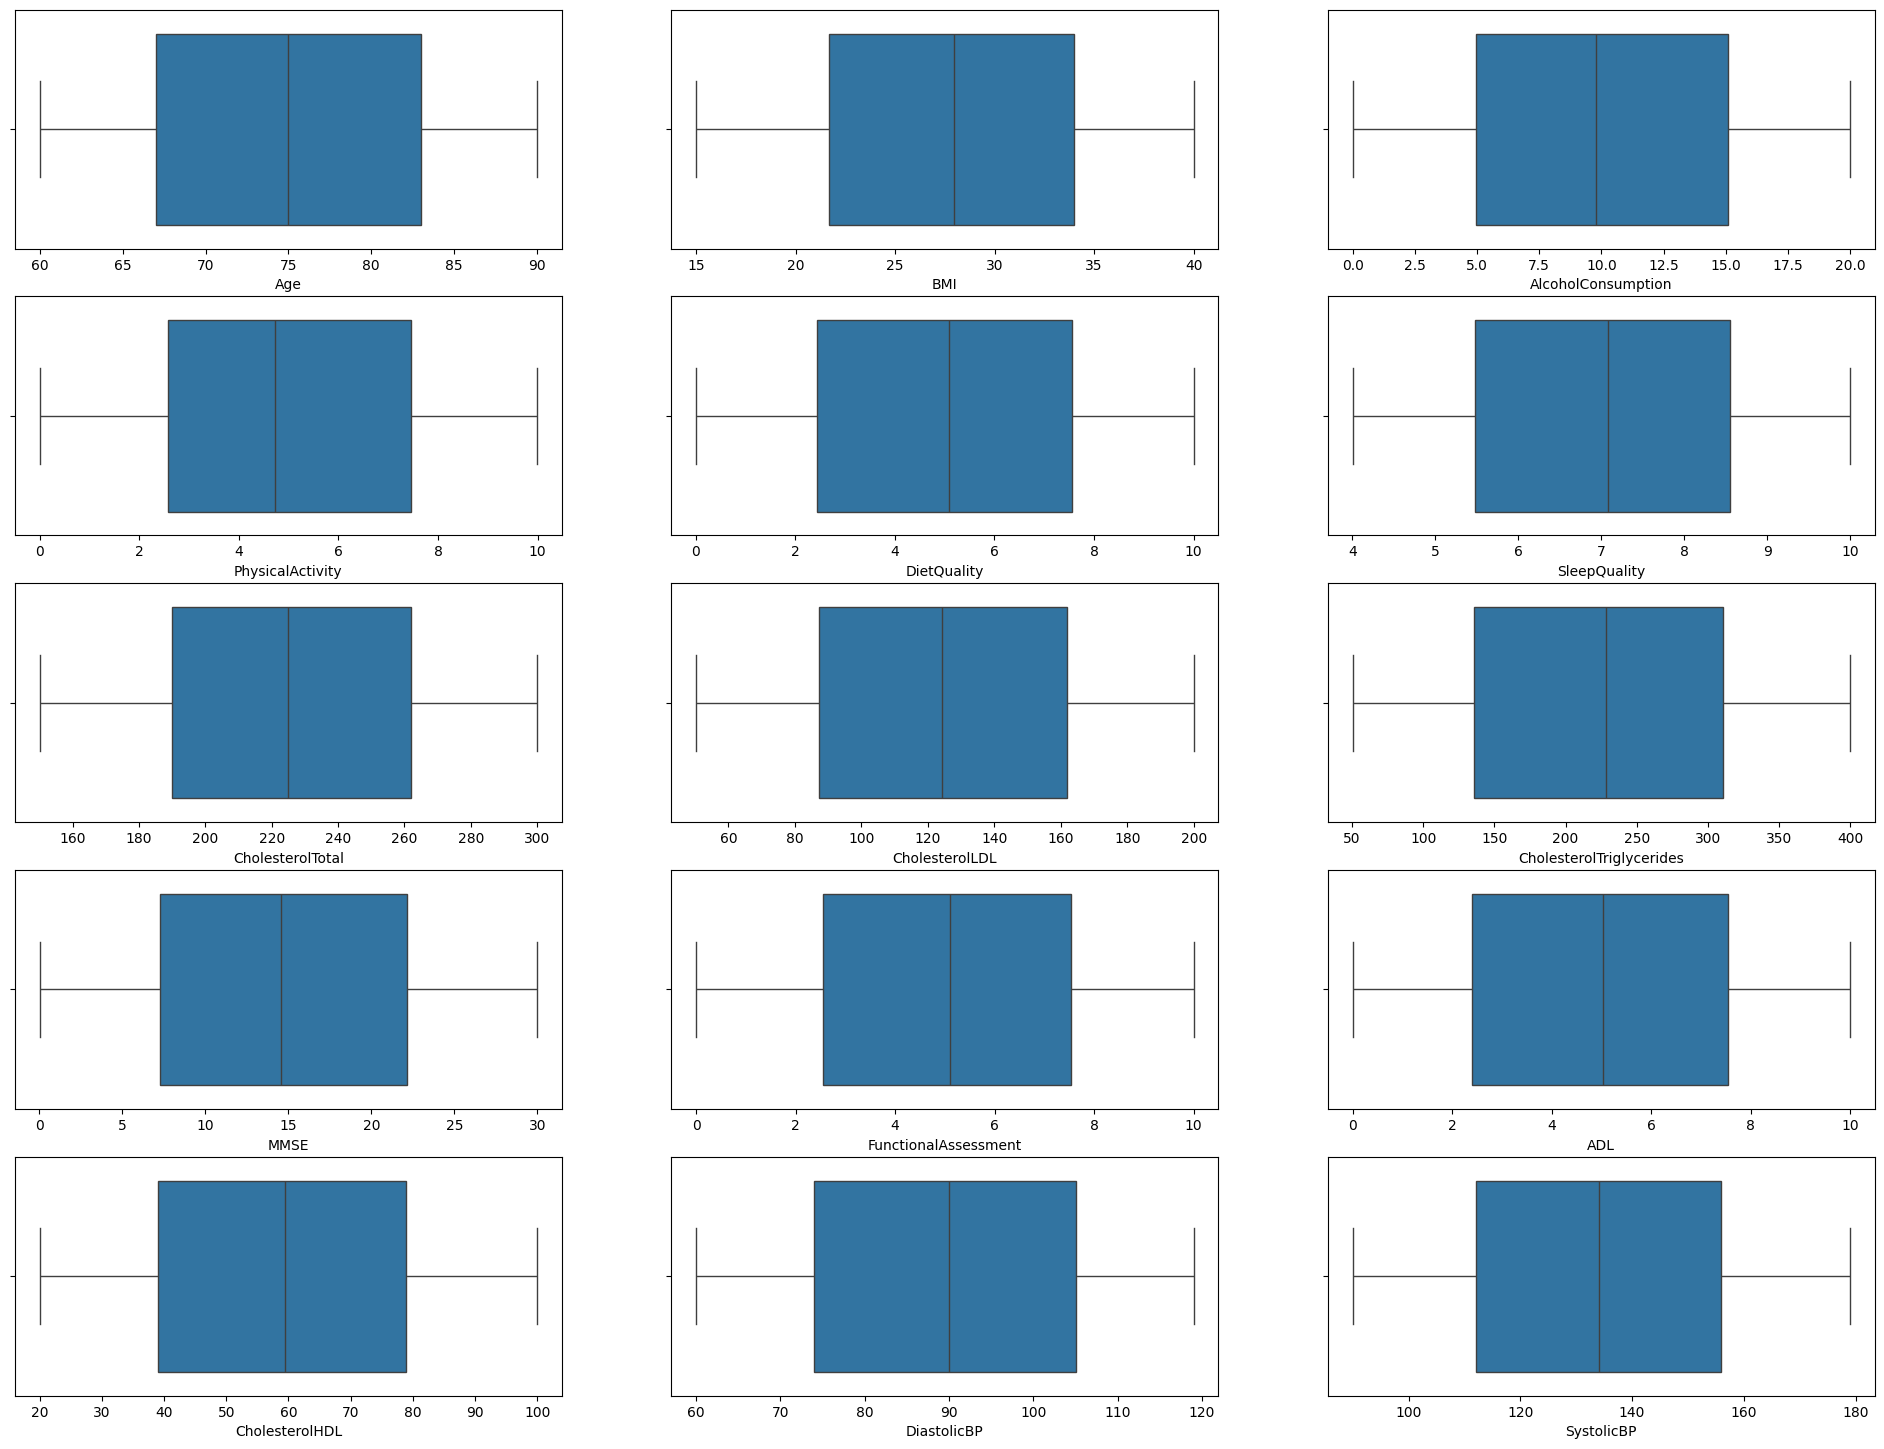

In [156]:
fig, axs = plt.subplots(5,3,figsize = (24,18))

col_num = 0
linha = 5
coluna = 3

for i in range(linha):
  for j in range(coluna):
    sns.boxplot(data = dataset_treino, x = feat_numerico.columns[col_num], ax = axs[i,j])
    col_num +=1

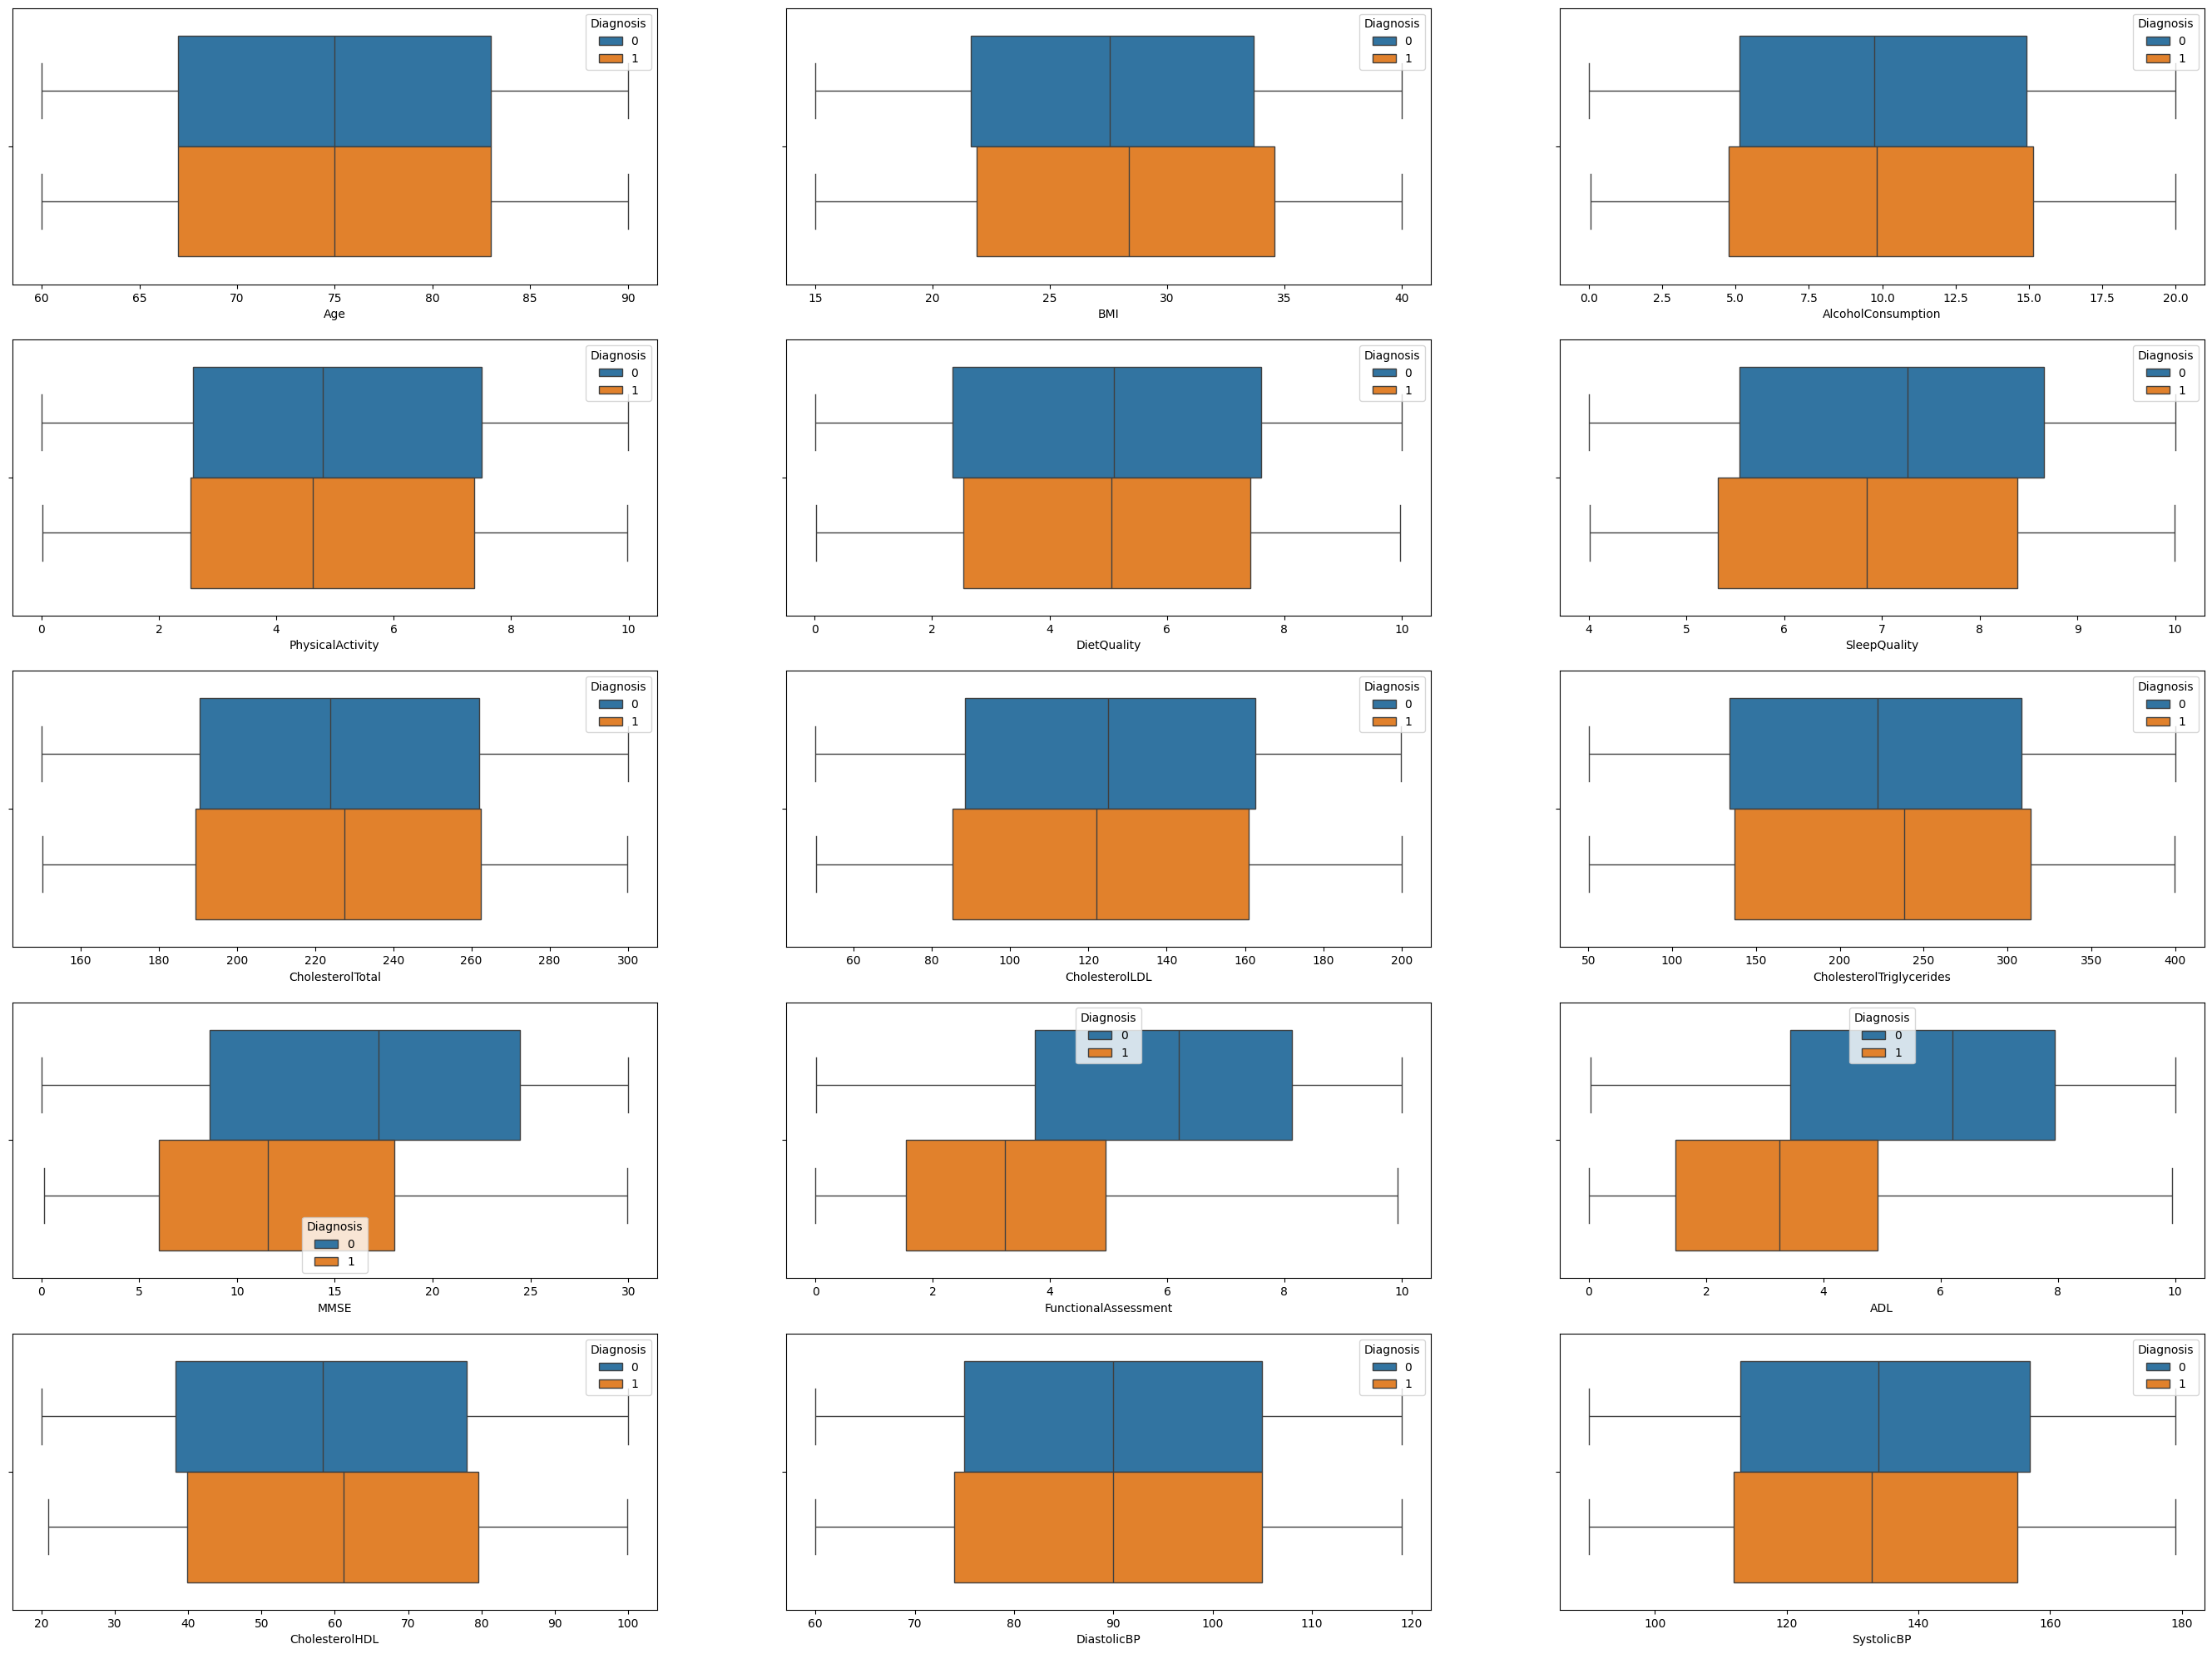

In [157]:
fig, axs = plt.subplots(5,3,figsize = (34,25))

col_num = 0
linha = 5
coluna = 3

for i in range(linha):
  for j in range(coluna):
    sns.boxplot(data = dataset_treino, x = feat_numerico.columns[col_num], ax = axs[i,j],hue = 'Diagnosis')
    col_num +=1

Insight

*  Pelos gráficos de boxplot feitos para cada variável numérica, temos que não há motivos de tratamento de outliers;
*  Outro ponto que vale ressaltar é que os dados separados pelos tipos de diagnostico também não apresenta nenhum tipo de outliers;
*  Algumas questões a serem levantados são gráficos os gráficos de FuncionalAssessiment e ADL onde podemos observar a diferencia entre os quartis e a mediana, esse diferença pode estar diretamente relacionado com a doença de modo que o Alzheimer em níveis mais avançado faz com  que o paciente perca suas funções motoras e que consequentemente diminui a pontuação ADL (Activities of Daily Living).

## Matriz de Correlação

In [158]:
corr = dataset_treino.corr().round(2)

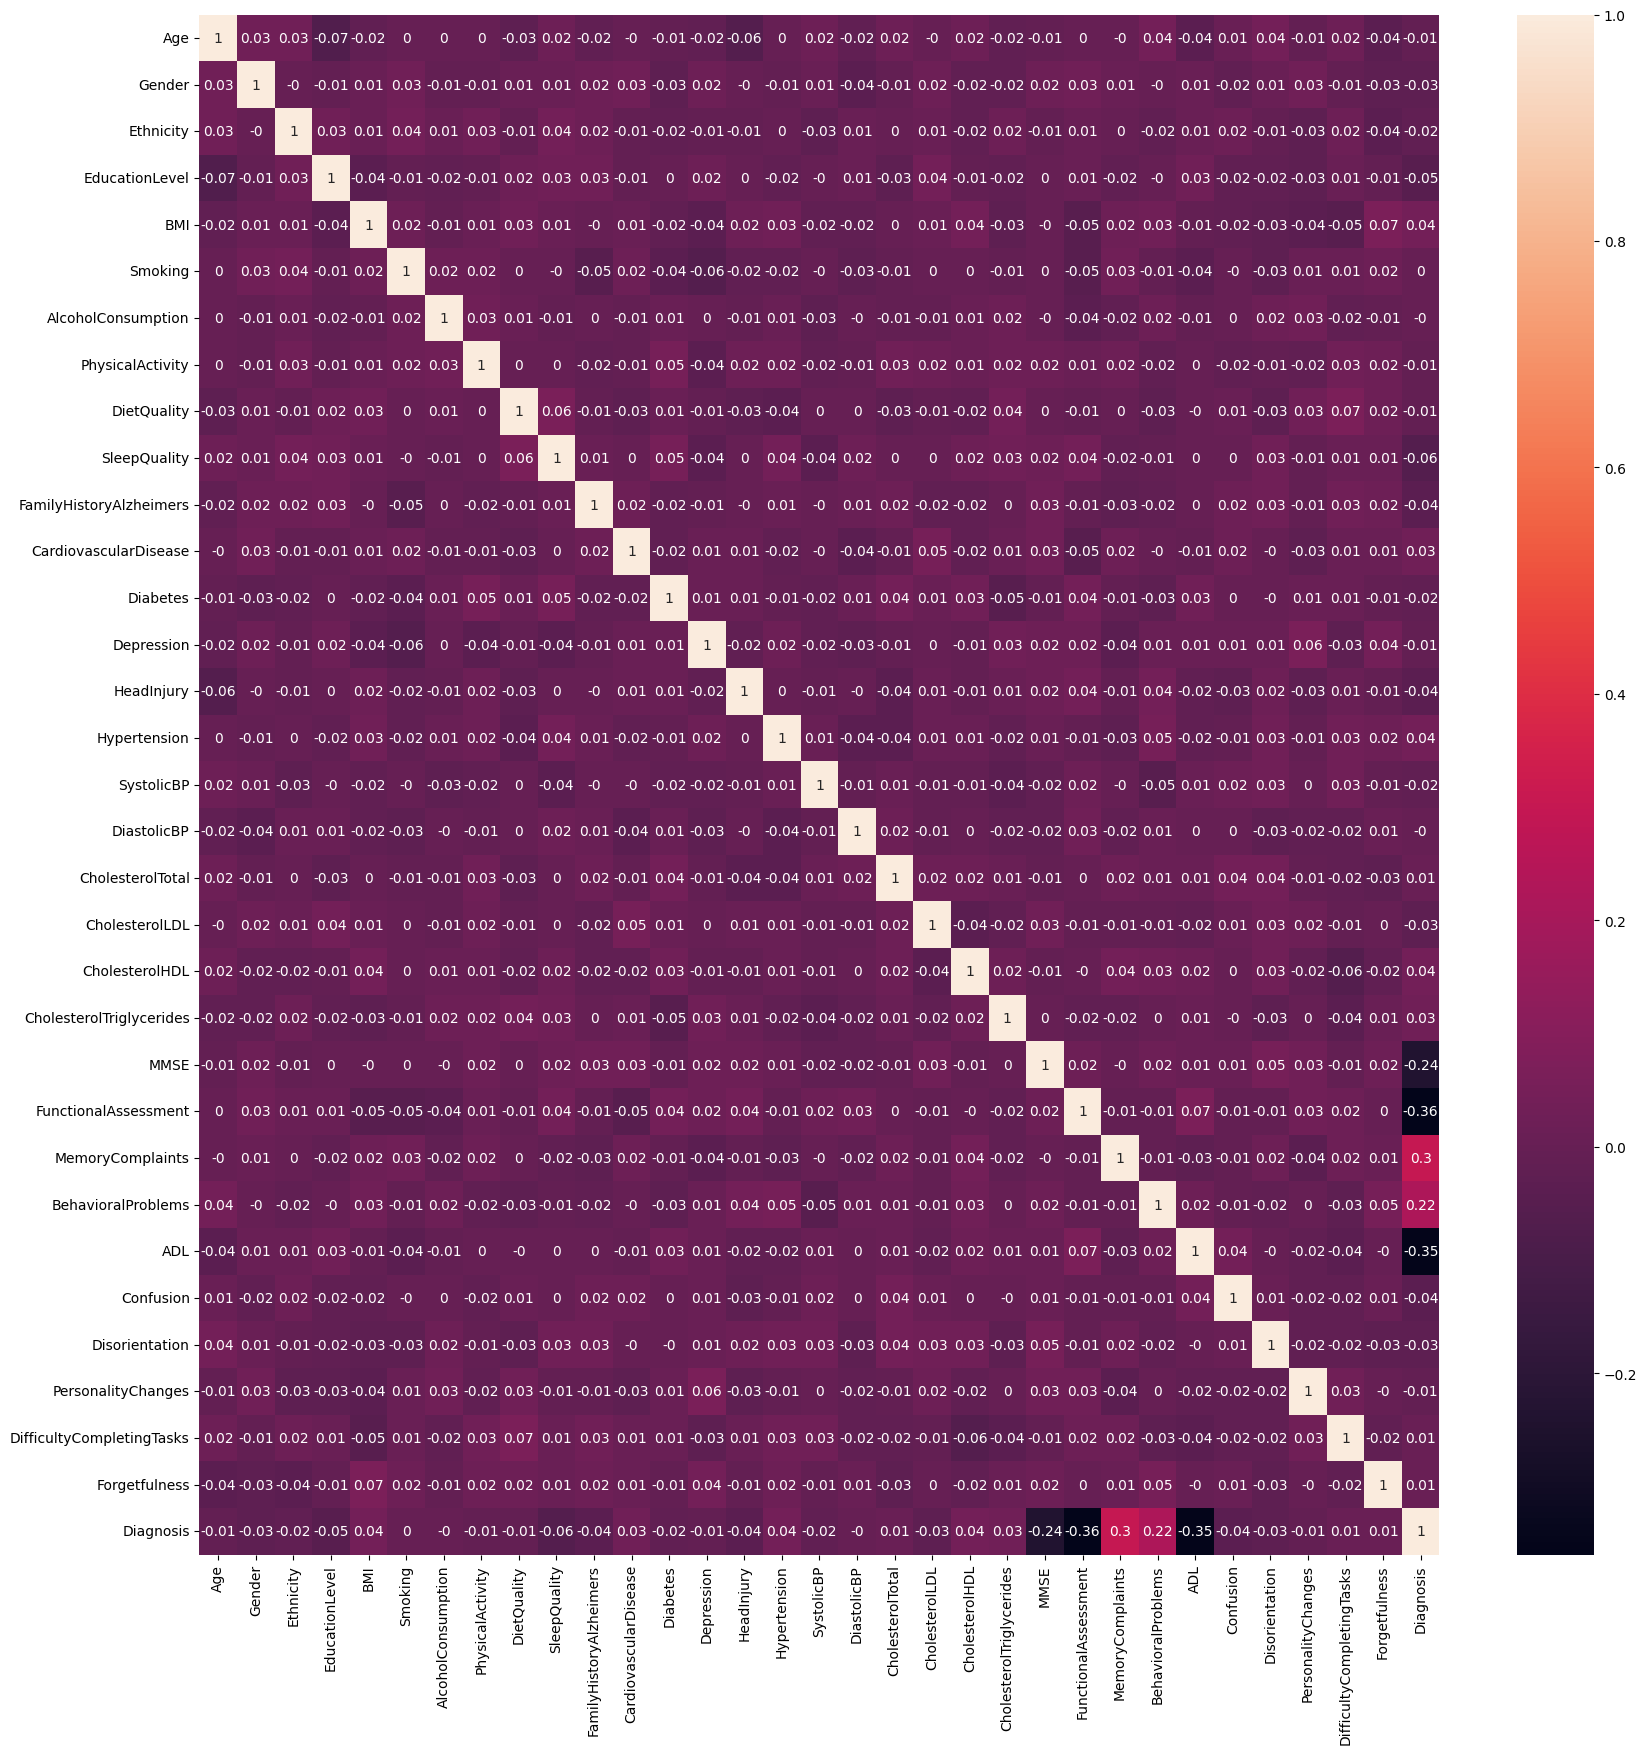

In [159]:
fig,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(corr, annot = True)

## Gráfico de Correlação


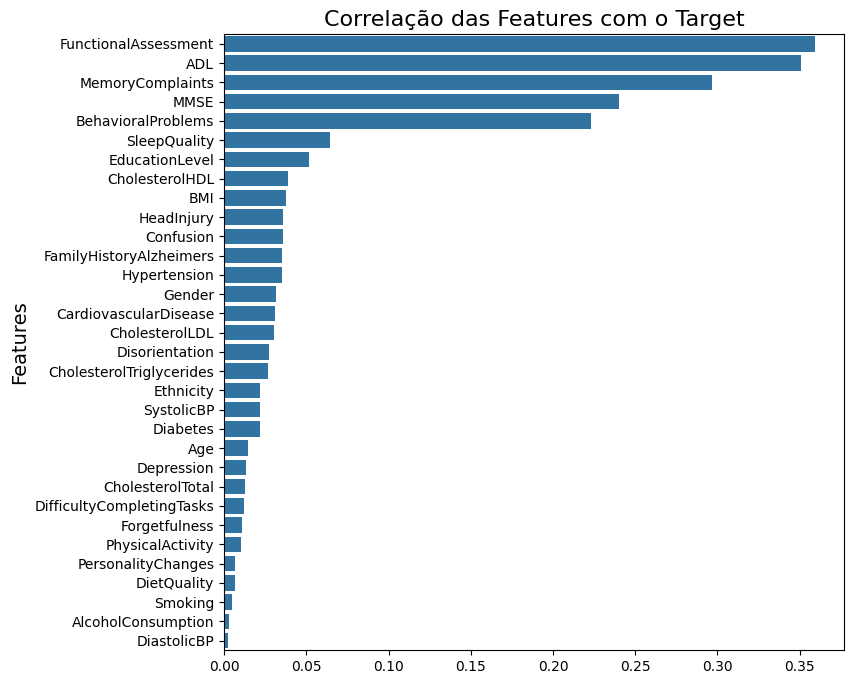

In [160]:
correlação = dataset_treino.corr()['Diagnosis'].drop('Diagnosis').abs()
correlação = correlação.sort_values(ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y=correlação.index, x=correlação.values)
plt.title('Correlação das Features com o Target', fontsize=16)
plt.ylabel('Features', fontsize=14)
plt.show()

Insights

*  No geral, podemos observar que a correlação entre as features são bem fracas;
*  Observando a correlação entre as features e a variável target, vemos que algumas features se destacam, dentre elas temos a MMSE(Exme de estado mental), FunctionAssessment,MemoryComplants,BehaviorProblems e ADL(Activities of daily Score);
*  A correlação dos valores de MMSE e FunctionAssessment com o Diagnosis está relacionado já que é uma das principais caracterísitca do Alzheimer e pode ser relatado antes mesmo na análise de Outliers que havia essa diferença de pontuação entre os pacinetes diagnosticadoss com e sem;
*  Para os MemoryComplants, BehaviorProblems e ADL(Activities of daily Score) também são fatores afetados diretamente com o Alzheimer, sendo que a MemoruComplants é um dos primeiros sintomas a se apresentar;
*  Uma observação em relação a variável idade é que ela possui correlação baixa com o target, isso mostra que apesar do data set ser somente de paciente de 60+, o fato do paciente adiquirir a doença independe se ele vai possuir com 60 ou 90 anos de idade, oque mostra que idade não necessáriamente é um fator chave para a doença.
*  Apesar da matriz de correlação nos mostrar quais são as variáveis com maior correlação com o target, foi decidido em não fazer uma seleção de features, já que pode haver uma perda de informação.

# Data Preparation

Como foi visto na etapa de entendimento dos dados, vimos que os nosso dados não posui dados nulos ou vazio, além disso, vimos que os dados numéricos nào apresentaram nenhum tipo de outliers tanto com os diagnostico separados ou juntos. Desse modo podemos partir para os preprocesamentos.

#Modeling

A etapa atual consiste na criação do modelo de Machine Learning, nesse caso essa etapa irá passar pos seguitentes passos:

*  Preparação e definição de qual modelo a ser utlizado, como atualemten há a existencia de diversos modelos para classificação binário, será criado uma função que teste todos os modelos e apresente a acurácia, precisão, recall e f1-score
. A partir desses valores será selecionado o o modelo principal para as futuras predições.

*  **Criação de Pipelines**, para trazer maior facilidade de compreensão do modelo e ficar mais próximos da realidade, serão criados pipelines de predição e pre processamentos.


*  **Cross Validation com Kfold**, após o fim da criação das pipelines o próximo passo será a validação cruzada do modelo para observar durante a criação do modelo se há a presença de overfitting.

*  **RandomSearchCV**, para trazer a melhor eficiencia do modelo será feito tuning utilizando o RandomSearchCV, essa etapa consiste na procura dos melhores valores para os hiperparamentros. Vale ressaltar que o fato de não utiliza o GridSearchCV se dá ao caso de demora do processamento do modelo.

*  **Nested Cross Validation**, de modo evitar que o nosso modelo não passou por overfitting durante o processo de busca de hiperparamentros, será feito um novo Cross Validation com Kfold utilizando agora o modelo com hiper parametros

In [161]:
models = {'SVC':SVC(),
          'RandomForestClassifier':RandomForestClassifier(),
          'DecisionTreeClassifier' : DecisionTreeClassifier(),
          'KNN Classifier' : KNeighborsClassifier(),
          'LogisticRegression' : LogisticRegression(),
          'XGBoost Classifier':XGBClassifier(objective = 'binary:logistic')
          }

In [162]:
def modelos_testes (models,X_train,y_train,X_test,y_test):
  for model_name, modelos in models.items():
    print(30*'--')
    print(model_name)
    print(30*'--')
    modelos.fit(X_train,y_train)
    y_train_pred = modelos.predict(X_test)
    print('O Valor da acurácia é de {}'.format(accuracy_score(y_test,y_train_pred)))
    print(classification_report(y_test,y_train_pred))

## Preprocessamento dos dados

*  Antes de gerar os resultados da função é necessário criar um transformador para normalizar as features numéricas, assim foi criado o pp_robust como um ColumnTransform e com uma de suas etapas o RobustScaler(). Em seguida foram criados novas varáveis que continham as features preprocessadas.

In [163]:
col_numerico = ['Age','BMI','AlcoholConsumption','PhysicalActivity',
                'DietQuality','SleepQuality','CholesterolTotal',
                'CholesterolLDL','CholesterolTriglycerides','MMSE',
                'FunctionalAssessment','ADL','CholesterolHDL','DiastolicBP',
                'SystolicBP']

col_categorico = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

pp_robust = ColumnTransformer(
    transformers = [
        ('num',RobustScaler(),col_numerico),
        ('categorical','passthrough',col_categorico)
    ]
)
pp_robust

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 ['Age', 'BMI', 'AlcoholConsumption',
                                  'PhysicalActivity', 'DietQuality',
                                  'SleepQuality', 'CholesterolTotal',
                                  'CholesterolLDL', 'CholesterolTriglycerides',
                                  'MMSE', 'FunctionalAssessment', 'ADL',
                                  'CholesterolHDL', 'DiastolicBP',
                                  'SystolicBP']),
                                ('categorical', 'passthrough',
                                 ['Gender', 'Ethnicity', 'EducationLevel',
                                  'Smoking', 'FamilyHistoryAlzheimers',
                                  'CardiovascularDisease', 'Diabetes',
                                  'Depression', 'HeadInjury', 'Hypertension',
                                  'MemoryComplaints', 'BehavioralProblems',
                                  'Confusion', 'Disorientation',
                                  'PersonalityChanges',
                                  'DifficultyCompletingTasks',
                                  'Forgetfulness'])])

In [164]:
X_train_preprocess = pp_robust.fit_transform(X_train,y_train)
X_test_preprocess = pp_robust.fit_transform(X_test,y_test)

In [165]:
modelos_testes(models,X_train_preprocess,y_train,X_test_preprocess,y_test)

------------------------------------------------------------
SVC
------------------------------------------------------------
O Valor da acurácia é de 0.8441860465116279
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       278
           1       0.84      0.69      0.76       152

    accuracy                           0.84       430
   macro avg       0.84      0.81      0.82       430
weighted avg       0.84      0.84      0.84       430

------------------------------------------------------------
RandomForestClassifier
------------------------------------------------------------
O Valor da acurácia é de 0.9465116279069767
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.94      0.90      0.92       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.9

Análise



*  Após a criação da função e obtenção dos resultados temos que o melhor modelo a ser utilizado é o XGBClassifier que é um modelo do XGBoost apresentando um valor da acurácia de 0.94 e precisão média de 0.94

## Pipeline

In [166]:
pipeline = ImbPipeline(
    steps = [
        ('pp_robust',pp_robust),
        ('adasyn',ADASYN(random_state = seed)),
        ('xgb',XGBClassifier(objective = 'binary:logistic'))
    ]
)
pipeline

Pipeline(steps=[('pp_robust',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolTriglycerides',
                                                   'MMSE',
                                                   'FunctionalAssessment',
                                                   'ADL', 'CholesterolHDL',
                                                   'DiastolicBP',
                                                   'SystolicBP']),
                                                 ('categorical', 'passthrough',
                                                  ['Gender', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [167]:
pipeline.fit(X_train,y_train)

y_pred_pipeline = pipeline.predict(X_test)

In [168]:
print(classification_report(y_pred_pipeline,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       282
           1       0.91      0.94      0.93       148

    accuracy                           0.95       430
   macro avg       0.94      0.95      0.94       430
weighted avg       0.95      0.95      0.95       430



Insight

*  Observando os resultado do classification report vemos que nosso modelo no presente momento tem a um percentual de precisão de 0.97 para ausência e 0.91 para presença da doença, esse valor se dá com o préprocessamento ADASYN criando dados sintéticos para a presença.

*  Outro ponto a ser observado é a coluna de support onde que indica a quantidade de categoria presente dentro dos dados utilizado para aprender, assim vemos que apesar da quantidade de positivo serem menores que do que os negativos, ainda há uma quantidade razoável para o modelo aprender oque traz mais confiabilidade que o nosso modelo consiga preditar novos dados.



## Tuning

Nessa etapa iremos utlizar o RandomSearchCV para encontrar os melhores hiper paramentros dentro do XGBClassifier. Para realizar esse processo será necessário criar um espaço de paremetros

In [169]:
espaco_parametros = {
    'max_depth' : randint(3,16),
    'sampling_method' : ['uniform','subsample','gradient_based'],
    'n_estimators': randint(20,100,200),
    'learning_rate':[0.1,0.2,0.3],
    'min_samples_split':randint(20,128),
    'tree_method':['auto', 'exact', 'approx', 'hist', 'gpu_hist']
}

In [170]:
melhor_modelo = RandomizedSearchCV(
    XGBClassifier(),
    espaco_parametros,
    cv = KFold(n_splits=5, shuffle = True),
    random_state = seed,
    n_iter = 10
)

melhor_modelo.fit(X_train_preprocess,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea4b80>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea5690>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea7c70>,
                                        'sampling_method': ['uniform',
                                                            'subsample',
                                                            'gradient_based'],
                                        'tree_method': ['auto', 'exact',
                                                        'approx', 'hist',
                                                        'gpu_hist']},
                   random_state=1337)

In [171]:
print(melhor_modelo.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 62, 'n_estimators': 288, 'sampling_method': 'uniform', 'tree_method': 'hist'}


## Pipeline + Tuning

Após encontrar os melhores hiperparamentros para o nosso modelo, é necessário atualizar pipeline, garantindo assim que o nosso novo pipeline seja capaz de preprocessar e em seguinda gerar uma predição com o modelo tunado.

In [172]:
pipeline_tuning = ImbPipeline(
    steps = [
        ('pp_robust',pp_robust),
        ('adasyn',ADASYN(random_state = seed)),
        ('xgb',melhor_modelo)
    ]
)
pipeline_tuning

Pipeline(steps=[('pp_robust',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality',
                                                   'CholesterolTotal',
                                                   'CholesterolLDL',
                                                   'CholesterolTriglycerides',
                                                   'MMSE',
                                                   'FunctionalAssessment',
                                                   'ADL', 'CholesterolHDL',
                                                   'DiastolicBP',
                                                   'SystolicBP']),
                                                 ('categorical', 'passthrough',
                                                  ['Gender', '...
                                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea4b80>,
                                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea5690>,
                                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb687ea7c70>,
                                                         'sampling_method': ['uniform',
                                                                             'subsample',
                                                                             'gradient_based'],
                                                         'tree_method': ['auto',
                                                                         'exact',
                                                                         'approx',
                                                                         'hist',
                                                                         'gpu_hist']},
                                    random_state=1337))])

In [173]:
y_pred_melhor = pipeline_tuning.predict(X_test)
print(classification_report(y_test,y_pred_melhor))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.93      0.93       152

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



Insight

*  Observando os valores de f1-score, precision e acurácia, vimos que não houve nenhum tipo de melhora em relação o modelo antes do tuning com o modelo após o tuning;

*  Possível causa para não ocorrer a melhora, pode estar relacionado com a qualdiade dos dados ou com a qualidade do pré processamento feito anteriormente;


* Outro ponto a levar em consideração é o tipo de análise realizado, para termos melhor conhecimento dos resultado obtidos devemos realizar um cross validation com o modelo obtido e obsevar se não ouve uma 'má sorte' de selecionar um seed que é inferior.

# Evaluation

## Cross Validation

A Validação do modelo não deve ficar somente a valores como uma única accurácia, pois isso não preveni que nosso modelo analisado esteja com overfitting, assim a validação com cruzada com KFold permite mlehor compreensão dos nosso resultado.

In [174]:

np.random_seed = seed

outer_cv = KFold(n_splits = 10, shuffle = True)
nested_scores = cross_val_score(pipeline_tuning, X_train, y_train, cv=outer_cv, scoring='accuracy')

# Exibir os resultados
print(f'Acurácia em cada fold do outer loop: {nested_scores}')
print(f'Média da acurácia: {nested_scores.mean()}')
print(f'Desvio padrão da acurácia: {nested_scores.std()}')

Acurácia em cada fold do outer loop: [0.9244186  0.97093023 0.90697674 0.95930233 0.94186047 0.94767442
 0.95348837 0.95348837 0.94186047 0.95321637]
Média da acurácia: 0.9453216374269007
Desvio padrão da acurácia: 0.017273506851716046


In [175]:
pd.DataFrame({'Valor da acurácia':nested_scores})

,Valor da acurácia
0,0.924419
1,0.970930
2,0.906977
3,0.959302
4,0.941860
5,0.947674
6,0.953488
7,0.953488
8,0.941860
9,0.953216


## Score

In [176]:
y_pred_melhor = pipeline_tuning.predict(X_test)
print(classification_report(y_test,y_pred_melhor))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.93      0.93       152

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



## Matriz de Confusão

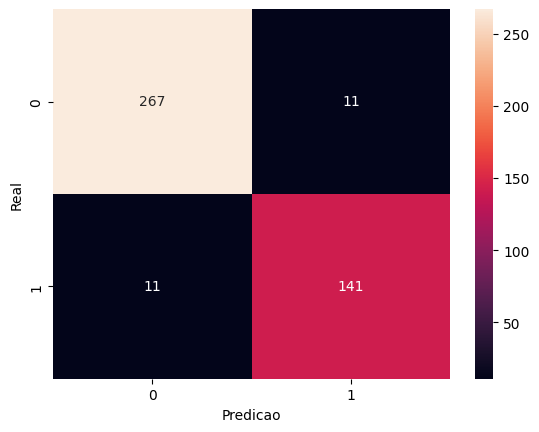

In [177]:
confusao = confusion_matrix(y_test, y_pred_melhor)

sns.heatmap(confusao,annot = True, fmt = 'd').set(xlabel = 'Predicao',ylabel = 'Real')
plt.show()

Insight

* Observando o valor de Precisão e do Recall comparando com a matriz de confusão chegamos a alguns pontos que confirmam o nooso modelo:
  * Precisão: A precisão do modelo chegou a 93% de precisão para determinar a presença da doença, na matriz de confusão emos 152 valores com diagnóstico positivo e 141 previsto;

  * Recall: O modelo chegou a prever corretamente a presença da doença 93%, isso presente dentro da matrix de correlação onde de 152 pacientes 141 foram preditos com a doença.

## Curva-ROC

In [178]:
## probabildiade de predição
xgb_probs = melhor_modelo.predict_proba(X_test_preprocess)

## probabilidae de positivos
xgb_probs = xgb_probs[:, 1]

In [179]:
xgb_auc = roc_auc_score(y_test,xgb_probs)
print('XGBClassifier AUROC score:{}'.format(xgb_auc.round(3)))

XGBClassifier AUROC score:0.954


In [180]:
## Calculando o Curva ROC para plotar
xgb_fpr, xgb_tpr,_ = roc_curve(y_test,xgb_probs)

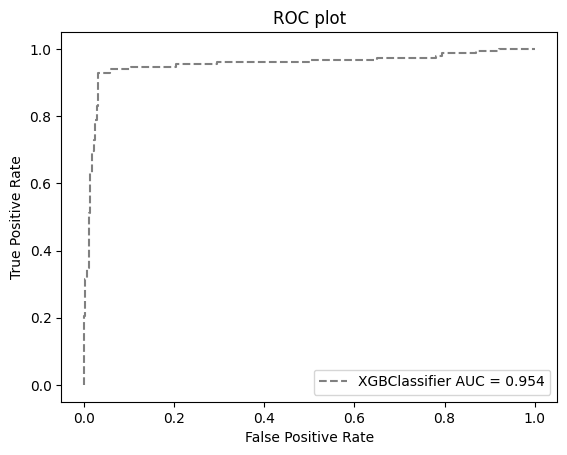

In [181]:
plt.plot(xgb_fpr,xgb_tpr,linestyle = '--',label = 'XGBClassifier AUC = {}'.format(xgb_auc.round(3)),color = 'grey')
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusão

Conclusão

*  No Geral temos que nosso modelo é excelente;
* Em relação aos objetivos tratado no business understanding todos os pontos foram respondidos onde temos as principais features que mais se relaciona com o target, além disso foi possível a construção de um moedelo preditivo para a doença de Alzheimer;
*  Analisando o Corss Validation observamos que a cada partição realizada temos uma acurácia maior que 89% oque indica que nosso modelo está prevendo de formar otimizada. Porém comparando com o valor obtindo antes da busca dos melhores hiperparametros vimos que houve um aumento relativamente baixo;
*  Em relação a Curva ROC e a pontuação AUC temos que nosso modelo tem uma ótima capacidade de divisibilidade dos resultados, com a pontuação AUC acima dos 0.9 como visto no gráfico acima, esse valor mostra que para as novas entradas o nosso modelo soube lidar bem com a classificação de cada uma dos resultados;
*  Em relação a matriz de confusão, é possível observar que o nosso modelo soube classifcar muito bem o nosso dataset de test já que grande parte dos resultados foram verdadeiros positivos e verdadeiro negativos. Um ponto interessante de falar sobre a matriz de consufsão é que como nosso problema está relacionado com questões médicas, temos que o nosso modelo gernado resultado como falso positivo se torne muito mais perigoso e assim nosso modelos deve o maximo evitar esse quadrante;


# Deploy

In [182]:
with open('pp_robust.pkl','wb') as file:
  pickle.dump(pp_robust,file)

In [183]:
with open('pipeline_tuning.pkl','wb') as file:
  pickle.dump(pipeline_tuning,file)

In [186]:
dados.to_csv('dataset_alzheimer.csv',index =False)